# Classifying newswires: a multiclass classification example

This example is taken from chapter 3.5 (page 78) in the book. In the previous example (IMDB) we worked on binary classification where the output is one of two things. Here we will work with Reuters newswires toclassify them into 46 mutually exclusive topics. Each newswire has a single class asigned to it, making this an example of single label, multi-class classification. 

## Load data
Like with the IMDB example, the Reuters dataset comes packaged with Keras so we can import directly from there. Again we will restrict it to the 10,000 most frequently used words.

In [2]:
from keras.datasets import reuters

(train_d,train_l),(test_d,test_l) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


## Checking data
Let's check the size of the rain/test data and what each contain:

In [4]:
train_d.size, train_l.size, test_d.size, test_l.size

(8982, 8982, 2246, 2246)

Here we have 8982 examples for training and 2246 for testing. Again, each news report is stored as a list of integers:

In [5]:
train_d[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
train_l[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16], dtype=int64)

The labels are no longer simply 0 or 1, as can be seen for the first 10 xamples in the training set above. In this case we have 46 different classes.

### Decoding newswires back to text

In [11]:
word_index = reuters.get_word_index()
rev_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [13]:
decoded_newswire = ' '.join([rev_word_index.get(i-3,'?') for i in train_d[0]])

In [14]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Data preparation

As with the IMDB example, we need to turn the list of lists into a vectorized form. Here we will again one-hot encoding of the data.

### Encoding the data

In [23]:
import numpy as np

def vectorize_sequence(sequences,dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        result[i,sequence] = 1.
    return result


In [33]:
x_train = vectorize_sequence(train_d)
x_test = vectorize_sequence(test_d)

Now we also need to vectorize the labels. In this case we have two options. The first is to turn the label list into an integer tensor. The second option is to use one-hot encoding, like we did for the input data. In this case, it would be a 46 dimensional tensor with zeros everywhere except a one corresponding to the class of the news report.

In [34]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1.
    return results

In [36]:
y_train = to_one_hot(train_l)
y_test = to_one_hot(test_l)

In [40]:
y_train[:5,:]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

Note that what we did above can also be implemented sing the built in functiosn in Keras:

In [37]:
from keras.utils.np_utils import to_categorical

In [42]:
y_train = to_categorical(train_l)
y_test = to_categorical(test_l)

In [43]:
y_train[:5,:]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 

## Build network
Like with the previous example, we will use a series of dense fully connected layers here. The main difference this time is that instead of one output node (representing two possibilities), we have 46 with this example. We also need to use more units per layer, since 16-dimensional space may be too limited to learn 46 different classes.

In [44]:
from keras import models
from keras import layers

In [45]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

### Compile the model
The best loss function to use in this case is the categorical cross-entropy, which measures the distance between the probability distribution output by the network and the desired probability.

In [46]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

## Validation set
Here we will set 1000 samples from the training data aside for the validation set.

In [48]:
x_val = x_train[:1000]
y_val = y_train[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

## Train the network
Train for 20 epochs.


In [50]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 237us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 188us/step - loss: 1.0953 - acc: 0.7650 - val_loss: 1.1714 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.8699 - acc: 0.8158 - val_loss: 1.0796 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 193us/step - loss: 0.7037 - acc: 0.8474 - val_loss: 0.9851 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 2s 201us/step - loss: 0.5671 - acc: 0.8800 - val_loss: 0.9412 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 181us/step - loss: 0.4587 - acc: 0.9045 - val_loss: 0.9084 - val_acc: 0.8010


### Plot training and validation loss

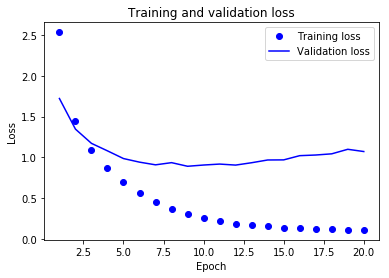

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,21)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

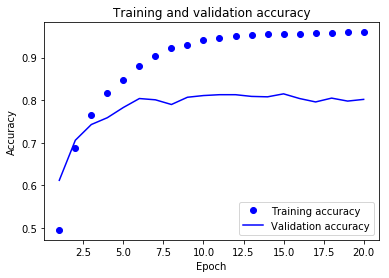

In [54]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1,21)

plt.plot(epochs,acc_values,'bo',label='Training accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see that the model begins to overfit after around nine epochs. Let's now retrain the model but stop after nine epochs.

## Retrain model with nine epochs

In [55]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

history_9 = model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 207us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 172us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 173us/step - loss: 1.0136 - acc: 0.7785 - val_loss: 1.1300 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 180us/step - loss: 0.7975 - acc: 0.8255 - val_loss: 1.0536 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.6391 - acc: 0.8629 - val_loss: 0.9760 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 2s 197us/step - loss: 0.5119 - acc: 0.8921 - val_loss: 0.9104 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 184us/step - loss: 0.4121 - acc: 0.9146 - val_loss: 0.8925 - val_acc: 0.8210
Epoch 8

In [56]:
model.evaluate(x_val,y_val)

1000/1000 [==============================] - 0s 197us/step


[0.935603476524353, 0.802]

So here we have an accuracy of around 80% on the validation data.

### Predictions
We can use the model to make predictions on the data that it has not seen (the test dataset). In this case, each prediction is a 46-dimensional vector, where the values should sum to one.

In [57]:
predictions = model.predict(x_test)

In [61]:
predictions[0].shape

(46,)

In [64]:
np.sum(predictions[0])

0.9999997

To find the predicted class, we just need to find which entry has the largest value:

In [65]:
np.argmax(predictions[0])

3

Let's evaluate the accuracy of the model on the test data:

In [59]:
two_layer_64_test = model.evaluate(x_test,y_test)

2246/2246 [==============================] - 0s 182us/step


In [60]:
two_layer_64_test

[1.023077686026175, 0.7756010686194165]

The accuracy on the test dataset is around 78%, which isn't too far from the validation which was 80%.

## Casting tensors as integer tensors
In the work was done above, the labels were cast as one-hot encoded vectors. An alternative is to cast the labels as an integer tensor, where instead of having a sparse 46-dimensional vector for each example, we just assign the integer corresponding to the class. In this case we can simply cast the labels using Numpy as follows:

In [66]:
y_train_int = np.array(train_l)
y_test_int = np.array(test_l)

In [67]:
y_train_int[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16], dtype=int64)

The only difference for this approach is the selection of the loss function. For the one-hot encoded labels, we used the categorical cross-entropy. In this case, we should use sparse categorical cross-entropy (which is mathematically equivalent).

In [68]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Model tests

### Information bottleneck
We currently have 46 nodes in the output layer, and 64 for the layers preceeding it. Let's see what happens if we have intermediate layers that are significantly less than 46-dimensional (e.g. 4-dimesional)

In [77]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))



In [78]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [79]:
history_bn = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=128,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 336us/step - loss: 2.9299 - acc: 0.3713 - val_loss: 2.1127 - val_acc: 0.5880
Epoch 2/20
7982/7982 [==============================] - 2s 270us/step - loss: 1.6849 - acc: 0.6505 - val_loss: 1.5471 - val_acc: 0.6430
Epoch 3/20
7982/7982 [==============================] - 2s 247us/step - loss: 1.2798 - acc: 0.7161 - val_loss: 1.4109 - val_acc: 0.6930
Epoch 4/20
7982/7982 [==============================] - 2s 234us/step - loss: 1.0856 - acc: 0.7493 - val_loss: 1.3342 - val_acc: 0.7020
Epoch 5/20
7982/7982 [==============================] - 2s 243us/step - loss: 0.9631 - acc: 0.7704 - val_loss: 1.3048 - val_acc: 0.7140
Epoch 6/20
7982/7982 [==============================] - 2s 250us/step - loss: 0.8696 - acc: 0.7934 - val_loss: 1.3052 - val_acc: 0.7240
Epoch 7/20
7982/7982 [==============================] - 2s 266us/step - loss: 0.7929 - acc: 0.8087 - val_loss: 1.3057 - val_acc: 0.7300


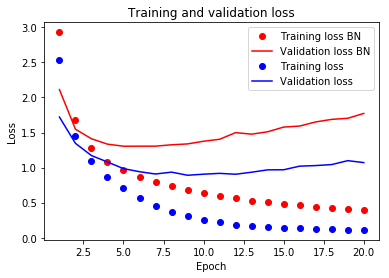

In [82]:
history_dict_bn = history_bn.history
loss_values_bn = history_dict_bn['loss']
val_loss_values_bn = history_dict_bn['val_loss']
epochs = range(1,21)

plt.plot(epochs,loss_values_bn,'ro',label='Training loss BN')
plt.plot(epochs,val_loss_values_bn,'r',label='Validation loss BN')
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

As we can see, by restricting the second hidden layer to four units increases the loss on both the training and validation datasets.

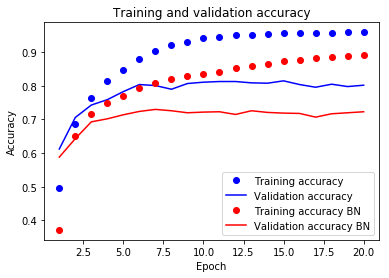

In [83]:
acc_values_bn = history_dict_bn['acc']
val_acc_values_bn = history_dict_bn['val_acc']
epochs = range(1,21)

plt.plot(epochs,acc_values,'bo',label='Training accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation accuracy')
plt.plot(epochs,acc_values_bn,'ro',label='Training accuracy BN')
plt.plot(epochs,val_acc_values_bn,'r',label='Validation accuracy BN')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()